# Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


For changing the style of the plot, we can also redefine default parameters. This can be done on the fly with the rcParams dictionary. This is one example were we change the default color cycle and various line properties.
The line cycle definition is different depending on the Matplotlib version.

In [2]:
try:
    from cycler import cycler
except:
    pass
# example usage:
# cycler('color', ['r', 'g', 'b', 'y']) + cycler('lw', [1, 2, 3])

plt.rcParams['patch.linewidth'] = 0.5
#plt.rcParams['patch.facecolor'] = '348ABD'  # blue
#plt.rcParams['patch.edgecolor'] = 'EEEEEE'
plt.rcParams['patch.antialiased'] = True

plt.rcParams['font.size'] = 12.0

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['axes.labelcolor'] =  '555555'
#axes.axisbelow: True       # grid/ticks are below elements (eg lines, text)


# want to define these colors:
# E24A33 : red, 348ABD : blue, 988ED5 : purple, 777777 : gray
# FBC15E : yellow, 8EBA42 : green, FFB5B8 : pink

colorlist = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']
#colornames = ['red', 'blue', 'purple', 'gray', 'yellow', 'green', 'pink']
try:
    # newer Matplotlib 

    plt.rcParams['axes.prop_cycle'] = cycler('color', colorlist)
except:
    # older Matplotlib (<1.5 I think)
    plt.rcParams['axes.color_cycle'] = colorlist

#xtick.color: 555555
#xtick.direction: in

#ytick.color: 555555
#ytick.direction: in

plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.linestyle'] =  '-'

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'

plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.default'] = 'regular'

For interpreting the coordinates, we need some specific modules to parse them into Python objects etc.

In [3]:
import astropy
import astropy.coordinates as coordinates
import astropy.units as u

import astropy.constants as c
from astropy.table import Table

# 2MASS Extended Source Catalog Redshift Survey

## The data

The data is the 2MASS Extended Source Catalog Redshift 

Available at: https://www.cfa.harvard.edu/~dfabricant/huchra/2mass/

Has 29 fixed width (Fortran format) columns. 
Columns defined in the header of the data file.

We use the Astropy.Tables fixed-width reader to read this data.


In [5]:
from astropy.table import Table
import astropy.constants as c
import astropy.units as u
colnames = ('id', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc',
    'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 
    'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'ev', 'vc', 
    'vsrc', 'CAT_ID')
colstarts = (0, 16, 26, 36, 46, 56, 63, 70, 77, 84, 91, 98, 104, 110, 
             116, 122, 128, 134, 140, 146, 152, 158, 163, 169, 172, 
             179, 183, 185, 205)
gals = Table.read('data/2mrs_v240/catalog/2mrs_1175_done.dat',
            format='ascii.fixed_width_no_header',
            names=colnames,
            col_starts=colstarts,
             )

With Astropy.Tables, just listing the columns gives an OK overview of what is there.

In [6]:
gals

id,RAdeg,DECdeg,l,b,k_c,h_c,j_c,k_tc,h_tc,j_tc,e_k,e_h,e_j,e_kt,e_ht,e_jt,e_bv,r_iso,r_ext,b/a,flgs,type,ts,v,ev,vc,vsrc,CAT_ID
str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str5,str2,int64,int64,str1,str19,str28
00424433+4116074,10.68471,41.26875,121.1743,-21.57319,0.797,0.929,1.552,0.743,0.881,1.497,0.016,0.016,0.015,0.017,0.017,0.016,0.683,3.208,3.491,0.473,Z111,3A2s,ZC,-300,4,N,1991RC3.9.C...0000d,MESSIER_031
00473313-2517196,11.88806,-25.2888,97.36301,-87.96452,3.815,4.132,4.858,3.765,4.077,4.798,0.016,0.015,0.015,0.017,0.016,0.016,0.019,2.799,2.965,0.264,Z111,5X_s,ZC,243,2,N,2004AJ....128...16K,NGC_0253
09553318+6903549,148.88826,69.06526,142.0919,40.90022,3.898,4.131,4.784,3.803,4.043,4.69,0.016,0.016,0.015,0.018,0.018,0.016,0.08,2.688,2.878,0.517,Z111,2A2s,ZC,-34,4,N,1991RC3.9.C...0000d,MESSIER_081
13252775-4301073,201.36565,-43.01871,309.51639,19.41761,3.948,4.244,4.931,3.901,4.203,4.876,0.015,0.016,0.015,0.016,0.017,0.016,0.115,2.445,2.613,0.957,Z111,-2__P,ZC,547,5,N,1978PASP...90..237G,NGC_5128
13052727-4928044,196.36366,-49.4679,305.27151,13.34017,4.471,4.79,5.508,4.421,4.735,5.444,0.016,0.016,0.015,0.017,0.017,0.016,0.176,2.627,2.772,0.308,Z111,6B_s,ZC,563,3,N,2004AJ....128...16K,NGC_4945
01335090+3039357,23.4621,30.65994,133.61024,-31.33081,4.477,4.697,5.346,4.087,4.329,5.003,0.02,0.018,0.017,0.044,0.038,0.029,0.041,2.699,3.032,0.792,Z111,5A4s,ZC,-179,3,N,1991RC3.9.C...0000d,MESSIER_033
09555243+6940469,148.96846,69.6797,141.40953,40.5671,4.636,5.003,5.744,4.61,4.973,5.704,0.015,0.015,0.015,0.015,0.015,0.015,0.156,2.357,2.542,0.396,Z111,0,ZC,203,4,N,1991RC3.9.C...0000d,MESSIER_082
03464851+6805459,56.70214,68.09611,138.17259,10.57999,4.682,4.952,5.494,4.362,4.682,5.169,0.02,0.019,0.018,0.043,0.04,0.033,0.558,2.571,2.876,0.858,Z111,6X2T,ZC,31,3,N,1999PASP..111..438F,IC_0342
13370091-2951567,204.25383,-29.86576,314.58353,31.97269,4.721,4.951,5.594,4.595,4.832,5.48,0.017,0.016,0.016,0.025,0.019,0.018,0.067,2.495,2.709,0.825,Z111,5X2s,ZC,513,2,N,2004AJ....128...16K,MESSIER_083


Or you can display the table in a separate browser window.

In [7]:
gals[:100].show_in_browser()

In [8]:
gals.colnames

['id',
 'RAdeg',
 'DECdeg',
 'l',
 'b',
 'k_c',
 'h_c',
 'j_c',
 'k_tc',
 'h_tc',
 'j_tc',
 'e_k',
 'e_h',
 'e_j',
 'e_kt',
 'e_ht',
 'e_jt',
 'e_bv',
 'r_iso',
 'r_ext',
 'b/a',
 'flgs',
 'type',
 'ts',
 'v',
 'ev',
 'vc',
 'vsrc',
 'CAT_ID']

One of the convenient things with Astropy Tables is that each column can have a unit. It is possible to give this at read-time, but we set it here.

In [9]:
gals['RAdeg'].unit = u.deg
gals['DECdeg'].unit = u.deg
gals['l'].unit = u.deg
gals['b'].unit = u.deg
gals['v'].unit = u.km/u.s

In [10]:
gals['RAdeg'].unit

Unit("deg")

Furthermore, we can load the coordinates into Astropy.coordinates SkyCoord object. With it we can access the coordinates in different systems etc.

In [11]:
coordarr = coordinates.SkyCoord(gals['RAdeg'].quantity, gals['DECdeg'].quantity, frame='fk5', equinox='J2000')
gals['coord'] = coordarr

We can also define the distance to the galaxies, we just tell it that it is redshift distance that we have.

In [12]:
zs = ((gals['v'] / c.c).decompose())
dist = coordinates.Distance(z=zs, allow_negative=True)
gals['dist'] = dist

In [13]:
print(gals.colnames)

['id', 'RAdeg', 'DECdeg', 'l', 'b', 'k_c', 'h_c', 'j_c', 'k_tc', 'h_tc', 'j_tc', 'e_k', 'e_h', 'e_j', 'e_kt', 'e_ht', 'e_jt', 'e_bv', 'r_iso', 'r_ext', 'b/a', 'flgs', 'type', 'ts', 'v', 'ev', 'vc', 'vsrc', 'CAT_ID', 'coord', 'dist']


## Plot : All sky

With the catalog we can plot the all sky maps. Here we use the Mollweide projection.

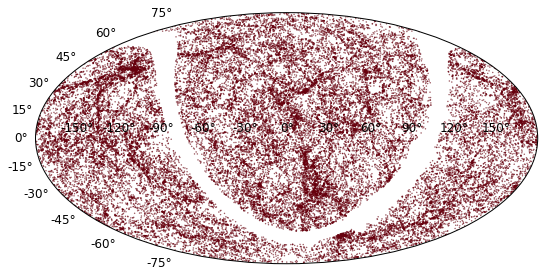

In [18]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(gals['coord'].ra.radian-np.pi, gals['coord'].dec.radian, 
           color=plt.cm.Reds(gals['dist']),
           s=1,
           zorder=-1, alpha=0.5,
          rasterized=True);

#plt.savefig('allsky_rasterized.pdf', dpi=600)
#plt.savefig('allsky_rasterized.svg', dpi=600)


### Exercise

Improve the plot:
 - Change the color scheme and transparency (alpha)
 - Change the axis tick labels to be more readable
 - Add axis labels
 - Plot a different parameter

## Cartesian coordinates

With the coordinates object and a distance, we can convert the RA, Dec and distance into cartesian coordinates in Mpc.

In [22]:
coords_xyz = coordinates.SkyCoord(ra=gals['coord'].ra, 
                                  dec=gals['coord'].dec, 
                                  distance=gals['dist'].quantity, frame='fk5', equinox='J2000')

 We can store the X,Y,Z coordinates now into the table

In [23]:
gals['X'] = coords_xyz.cartesian.x
gals['Y'] = coords_xyz.cartesian.y
gals['Z'] = coords_xyz.cartesian.z

In [24]:
gals['X'][:5]

-3.19393602411
3.10353032104
0.150029124455
-5.38050269402
-5.07177661034


## Plot: 2D

The catalog can now easily be drawn, as a whole in X,Y and Z space.

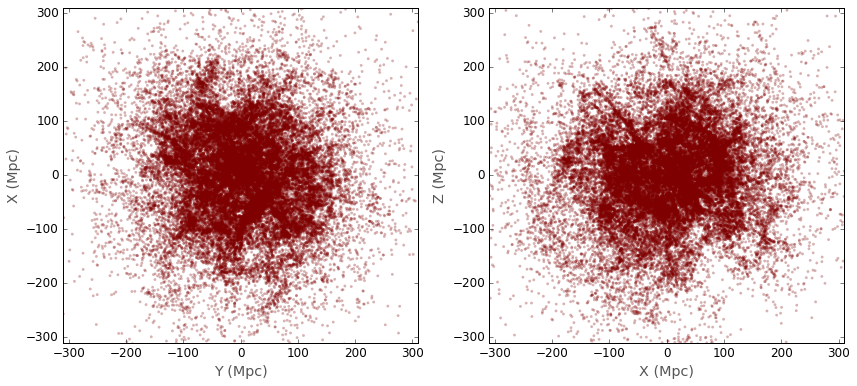

In [27]:
fig,ax = plt.subplots(1,2, figsize=(14,6))

ax1= plt.subplot(121)
ax1.scatter(gals['Y'], -1*gals['X'], 
            s=8, alpha=0.3, 
            color=plt.cm.OrRd(10**(gals['k_c'])), 
            edgecolor='None')
ax1.set_xlabel('Y (Mpc)')
ax1.set_ylabel('X (Mpc)')
ax1.set_xlim(-310,310)
ax1.set_ylim(-310,310)

#plt.figure(figsize=(7,6))
ax2 = plt.subplot(122)
ax2.scatter(-1*gals['X'],gals['Z'], 
            s=8, alpha=0.3, 
            color=plt.cm.OrRd(10**(gals['k_c']) ), 
            edgecolor='None',
           rasterized=True)
ax2.set_xlabel('X (Mpc)')
ax2.set_ylabel('Z (Mpc)')
ax2.set_xlim(-310,310)
ax2.set_ylim(-310,310);

This is very messy, so we need to think of how to display our data better, do wee need to plot a completely different plot, or can we do something with this?

### Exercise

 - Make a third suplot of Y vs. Z
 - Have each subplot show points in different colors (e.g. depending on K magnitude?)
 - Change the axis labels
 - Rasterize the plot and save it (plt.savefig('filename.pdf', dpi=1200))

## Plot: 2D - Filtering

Suppose we only want look at certain objects, or certain coordinates for example. Here we use the Boolean 'AND' operator '&'.

In [32]:
n = 2
n == True

False

In [34]:
decmin = 15
decmax = 30
ramin = 90
ramax = 295
czmin = 0
czmax = 12500
selection_dec = (gals['coord'].dec.deg>decmin) & (gals['coord'].dec.deg<decmax)
selection_ra = (gals['coord'].ra.deg>ramin) & (gals['coord'].ra.deg<ramax)
selection_czs = (gals['v']>czmin) & (gals['v']<=czmax)
selection_czs_pos = (gals['v']>czmin)

With this we can choose what to filter on. Creating a "master" filter which filters on all of the above.

In [35]:
selection = selection_dec & selection_ra & selection_czs

In [36]:
selection

array([False, False, False, ..., False, False, False], dtype=bool)

Selection is a Boolean array, that will just pick out the values with True.

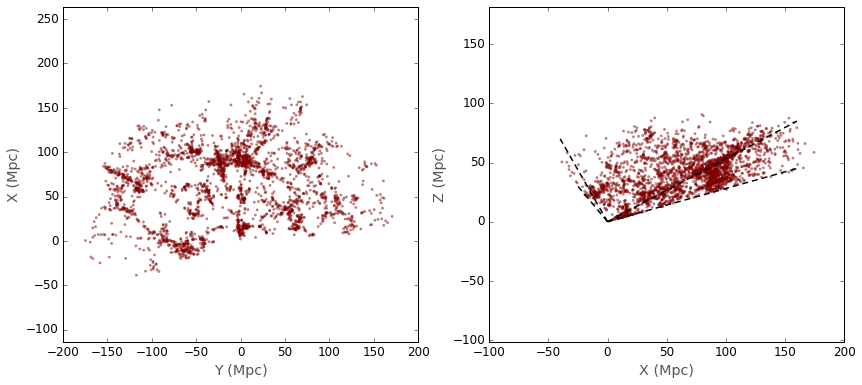

In [37]:
fig,ax = plt.subplots(1,2, figsize=(14,6))

ax1= plt.subplot(121)
ax1.scatter(gals['Y'][selection], -1*gals['X'][selection], 
            s=8, alpha=0.5, color=plt.cm.OrRd(10**(gals['k_c'][selection])), edgecolor='None')
ax1.set_xlabel('Y (Mpc)'); ax1.set_ylabel('X (Mpc)')
ax1.axis('equal');

ax2 = plt.subplot(122)
ax2.scatter(-1*gals['X'][selection],gals['Z'][selection], 
            s=8, alpha=0.5, color=plt.cm.OrRd(10**(gals['k_c'][selection]) ), edgecolor='None')
lstyle = dict(lw=1.5, color='k', dashes=(6,4))
ax2.plot([0,160], [0,85], **lstyle)
ax2.plot([0,160], [0,45], **lstyle)
ax2.plot([0,-40], [0,70], **lstyle)
ax2.plot([0,-25], [0,30], **lstyle)
ax2.set_xlabel('X (Mpc)'); ax2.set_ylabel('Z (Mpc)')
ax2.axis('equal');

### Exercise : 


 - Generate and plot another slice of the data 
     - i.e. filter on other RA, Dec and redshift velocity (distance)
     - filter directly on the X, Y, Z coordinates instead and plot a square selection
 - Just play around and try to improve it.

## Polar plot

The natural coordinates here is polar coordinates of course, so lets plot them in a polar plot as well. Here we only use the Dec slicing.

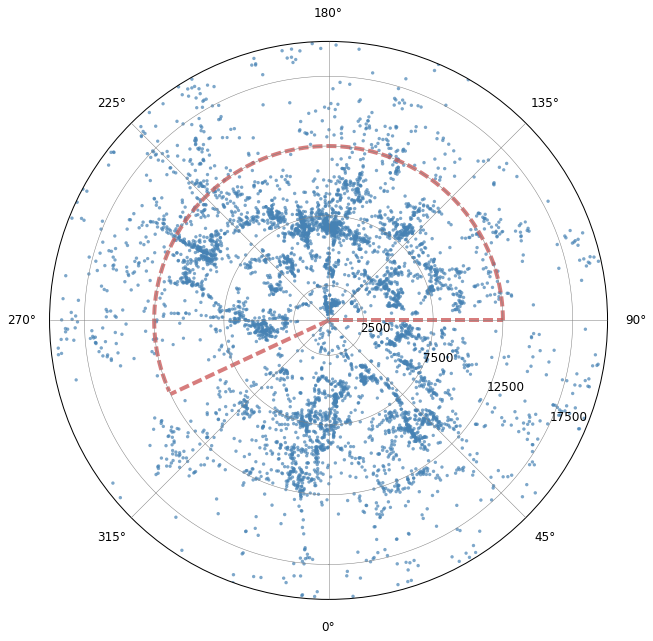

In [38]:
fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
sct = ax.scatter(gals['coord'].ra.radian[selection_dec], gals['v'][selection_dec], 
                     color='SteelBlue',
                     #color=plt.cm.Blues_r((coords_uzc.dec.deg[selection_dec])/100.), 
                     s=gals['k_c'][selection_dec], 
                     edgecolors="none", 
                     alpha=0.7,
                    zorder=0)
ax.set_rlim(0,20000)
ax.set_theta_offset(np.pi/-2)
ax.set_rlabel_position(65)
ax.set_rticks(range(2500,20001,5000));
ax.plot([(ramin*u.deg).to(u.radian).value, (ramin*u.deg).to(u.radian).value], [0,12500], 
        color='IndianRed', alpha=0.8, dashes=(10,4), lw=4)
ax.plot([ramax*np.pi/180., ramax*np.pi/180.], [0,12500],
        color='IndianRed', alpha=0.8, dashes=(10,4), lw=4)
theta = np.arange(ramin, ramax, 1)
ax.plot(theta*np.pi/180., np.ones_like(theta)*12500,
        color='IndianRed', alpha=0.8, dashes=(10,4), lw=4);

We here plot the selection that we did earlier as well. Polar plots are different from normal axes, therefore changing things are a bit different. The sizes of the scatter points are set by the k-magnitude.

### Exercise:

- Plot your slice of the data on the polar plot
- Add axes labels
- Plot several Dec slices together, in different colors.
- Tweak how the points are displayed.
- Annotate the plot.

## Plot: 3D

We have the whole data for the distribution of Galaxies from the 2MASS catalog. Can we plot something like this? I agree, this is not the best plot in the world, it is messy, what are they trying to say?

<img src="http://i.huffpost.com/gen/2023548/thumbs/o-LANIAKEA-MAP-900.jpg?1">

To do this we import the Axes3D object.

In [39]:
from mpl_toolkits.mplot3d import Axes3D

In [1]:
%%bash
less /home/magnusp/Desktop/one_solution.txt


# set the axis line colors white to hide
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.grid(False)
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

[t.set_va('center') for t in ax.get_yticklabels()]
[t.set_ha('right') for t in ax.get_yticklabels()]
[t.set_va('center') for t in ax.get_xticklabels()]
[t.set_ha('center') for t in ax.get_xticklabels()]
[t.set_va('bottom') for t in ax.get_zticklabels()]
[t.set_ha('right') for t in ax.get_zticklabels()]

ax.xaxis._axinfo['tick']['inward_factor'] = 0.1
ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
ax.yaxis._axinfo['tick']['inward_factor'] = 0.1
ax.yaxis._axinfo['tick']['outward_factor'] = 0.3
ax.zaxis._axinfo['tick']['inward_factor'] = 0.1
ax.zaxis._axinfo['tick']['outward_factor'] = 0.3

#draw c

/home/magnusp/dotfiles/.lessfilter: 18: /home/magnusp/dotfiles/.lessfilter: [[: not found


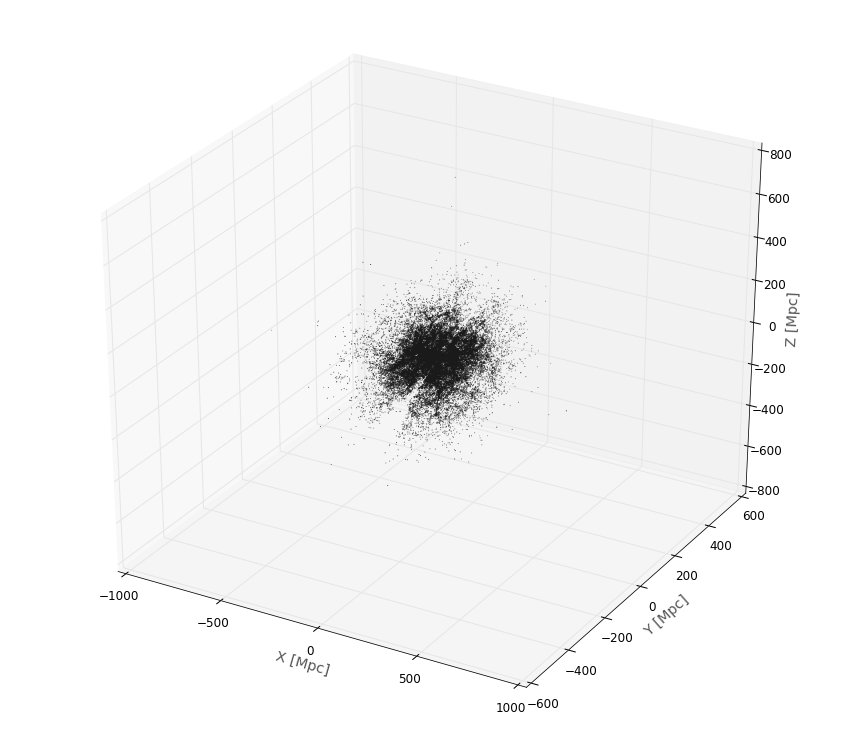

In [40]:
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(gals['X'], gals['Y'], 
           zs=gals['Z'], zdir='z', s=1, lw=0, c='0.1')

# set the axis line colors white to hide
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.grid(False)
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

[t.set_va('center') for t in ax.get_yticklabels()]
[t.set_ha('right') for t in ax.get_yticklabels()]
[t.set_va('center') for t in ax.get_xticklabels()]
[t.set_ha('center') for t in ax.get_xticklabels()]
[t.set_va('bottom') for t in ax.get_zticklabels()]
[t.set_ha('right') for t in ax.get_zticklabels()]

ax.xaxis._axinfo['tick']['inward_factor'] = 0.1
ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
ax.yaxis._axinfo['tick']['inward_factor'] = 0.1
ax.yaxis._axinfo['tick']['outward_factor'] = 0.3
ax.zaxis._axinfo['tick']['inward_factor'] = 0.1
ax.zaxis._axinfo['tick']['outward_factor'] = 0.3

#draw cube
r = [-310, 310]
from itertools import combinations, product
for s, e in combinations(np.array(list(product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e), lw=0.5, color="0.5",dashes=(5,2))
ax.set_xlabel('X [Mpc]')
ax.set_ylabel('Y [Mpc]')
ax.set_zlabel('Z [Mpc]');

I managed to get it to something like this, pending fixing the tick line thickness...

<img src='one_solution.png'>

The exercise is just for you to play around with this and make it look nicer.

### Exercise: 

 - Change the viewing angle.
 - Change the cube limits to highlight the structure better.
 - Turn off the axis lines.
 - Turn the grid off.
 - Turn off the grey background.
 - Perhaps change the ticks to be prettier?
 - Draw a cube around the data.
 - Is this a good way to represent this data set?

# Map of the Milky Way

Bessel VLA survey - http://bessel.vlbi-astrometry.org/parallax


** Format of input file ** 
|name | l |	b | Prlx | err | $\mu_\alpha$ cos ($\delta$) |err| $\mu_\delta$ | err | v_LSR | err  | Freq | Telescope | Ref | 
|--|--|	-- | -- | -- | -- | -- | -- | --| --| --| -- | -- | 
| [str] | [deg] | [deg] | [mas] | +/- | [mas/yr] | +/- | [mas/yr] | +/- | [km/s] | +/- | [GHz] | [str] | [str] | 
| G105.41+09.87 | 105.41 | 9.87 | 1.129 | 0.063 | -0.21 | 2.38 | -5.49 | 2.38 | -10.0 | 5.0 | 22.2 | VLBA | 2013ApJ...769...15X |

## Read the data

In [41]:
bessel = pd.read_table('data/bessel.tab',  
                   delim_whitespace=True,
                   names=['name', 'l', 'b', 'prlx', 'prlxerr', 'mua', 'muaerr', 
                          'mud', 'muderr', 'vlsr', 'vlsrerr', 'freq', 'telescope', 'ref'],
                     )

In [43]:
bessel.head()

,name,l,b,prlx,prlxerr,mua,muaerr,mud,muderr,vlsr,vlsrerr,freq,telescope,ref
0,Sgr-B2M,0.67,-0.04,0.130,0.012,-1.23,0.04,-3.84,0.11,61.0,5.0,22.2,VLBA,2009ApJ...705.1548R
1,Sgr-B2N,0.68,-0.03,0.128,0.015,-0.32,0.05,-4.69,0.11,64.0,5.0,22.2,VLBA,2009ApJ...705.1548R
2,G009.62+00.19,9.62,0.20,0.194,0.023,-0.58,0.05,-2.49,0.27,5.0,3.1,12.2,VLBA,2009ApJ...706..464S
3,G010.47+00.02,10.47,0.02,0.117,0.008,-3.86,0.02,-6.40,0.08,68.9,4.5,22.2,VLBA,2014ApJ...781..108S
4,G010.62-00.38,10.62,-0.38,0.202,0.019,-0.37,0.08,-0.60,0.06,-3.0,2.7,22.2,VLBA,2014ApJ...781..108S


## Convert to Astropy Table

In [44]:
bessel = Table(data=bessel.as_matrix(),                    
    names=['name', 'l', 'b', 'prlx', 'prlxerr', 'mua', 'muaerr', 
                          'mud', 'muderr', 'vlsr', 'vlsrerr', 'freq', 'telescope', 'ref'],
    dtype=[str, float, float, float, float, float, float, 
                          float, float,float, float, str, str, str],
     )

In [45]:
bessel[:5]

name,l,b,prlx,prlxerr,mua,muaerr,mud,muderr,vlsr,vlsrerr,freq,telescope,ref
str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,str4,str19
Sgr-B2M,0.67,-0.04,0.13,0.012,-1.23,0.04,-3.84,0.11,61.0,5.0,22.2,VLBA,2009ApJ...705.1548R
Sgr-B2N,0.68,-0.03,0.128,0.015,-0.32,0.05,-4.69,0.11,64.0,5.0,22.2,VLBA,2009ApJ...705.1548R
G009.62+00.19,9.62,0.2,0.194,0.023,-0.58,0.05,-2.49,0.27,5.0,3.1,12.2,VLBA,2009ApJ...706..464S
G010.47+00.02,10.47,0.02,0.117,0.008,-3.86,0.02,-6.4,0.08,68.9,4.5,22.2,VLBA,2014ApJ...781..108S
G010.62-00.38,10.62,-0.38,0.202,0.019,-0.37,0.08,-0.6,0.06,-3.0,2.7,22.2,VLBA,2014ApJ...781..108S


In [46]:
bessel['l'].unit = u.deg
bessel['b'].unit = u.deg
bessel['prlx'].unit = u.mas
bessel['prlxerr'].unit = u.mas
bessel['mua'].unit = u.mas/u.year
bessel['muaerr'].unit = u.mas/u.year
bessel['mud'].unit = u.mas/u.year
bessel['muderr'].unit = u.mas/u.year
bessel['vlsr'].unit = u.km/u.s
bessel['vlsrerr'].unit = u.km/u.s
bessel['freq'].unit = u.GHz

In [47]:
bessel['mud'].unit

Unit("mas / yr")

In [48]:
bessel['l'][:5]

0.67
0.68
9.62
10.47
10.62


## Plot the data

Since this dataset is a mapping of maser positions in our Galaxy, we have to plot them over a model image of the Galaxy...

In [49]:
distances = 1./bessel['prlx'].quantity.to(u.arcsec).value * 1e-3

In [50]:
from scipy.misc import imread

<img src="images/MilkyWay.jpg">

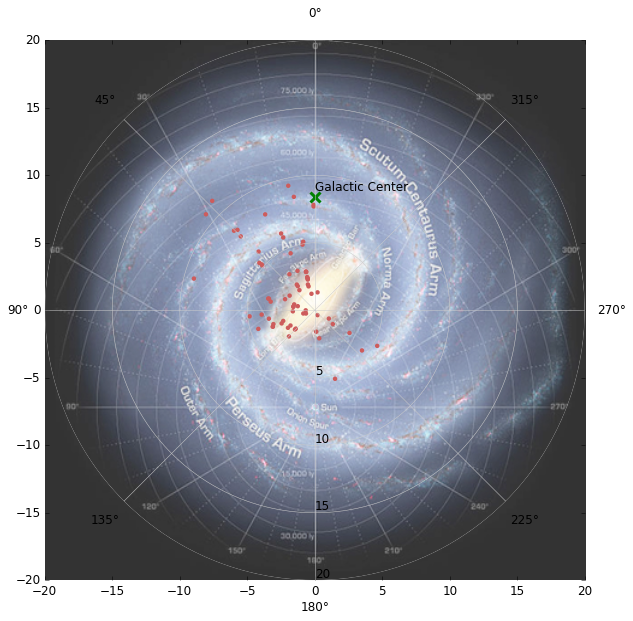

In [51]:
fig = plt.figure( figsize=(10,10))
rect1 = [0.15, 0.15, 0.75, 0.75]
ax_cartesian  = fig.add_axes(rect1, frameon=False)
#ax_cartesian.set_aspect('equal')
img = imread("images/MilkyWay.jpg")
ax_cartesian.imshow(img, zorder=0, extent=[-20, 20, -20, 20], alpha=0.8)

rect2 = [0.15, 0.15, 0.75, 0.75]
ax = fig.add_axes(rect2, polar=True, frameon=False)
sct = ax.scatter(bessel['l'].quantity.to(u.rad), 
                 distances, 
                 color='IndianRed',
                 #color=plt.cm.RdBu((coords_uzc.dec.deg[selection])/100.), 
                 #s=uzcat['Zmag'][selection_dec*selection_czs], 
                 edgecolors="none",
                 zorder=0)
gc = ax.plot(0,8.4, 'x', ms=10, mew=3, c='Green')
ax.text(0,8.9, 'Galactic Center')
ax.set_rlim(0,20)
ax.set_theta_offset(np.pi/2)

ax.set_rlabel_position(180)
ax.grid(color='0.8')

In [52]:
astropy.__version__

'1.1.1'

As you can see this is not correct!!!

### Exercise

This exercise is not perhaps super important, but I tried shifting the background or foreground to overlap so that we can plot in the figure. 

**Does anyone know how to do this?**

- Play around a bit with the plotting, this is one way of overlaying polar and cartesian coordinates.


Bessel survey results...


<img src="http://bessel.vlbi-astrometry.org/images/BeSSeL_sources.jpg">